In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# statistical tests
import scipy.stats as stats

%matplotlib inline

# Read Data

In [2]:
educacion = pd.read_csv('Data/datos_navent_fiuba/fiuba_1_postulantes_educacion.csv')
educacion.head()

,idpostulante,nombre,estado
0,NdJl,Posgrado,En Curso
1,8BkL,Universitario,En Curso
2,1d2B,Universitario,En Curso
3,NPBx,Universitario,En Curso
4,NPBx,Master,En Curso


In [3]:
educacion.shape

(298231, 3)

In [4]:
educacion.dtypes

idpostulante    object
nombre          object
estado          object
dtype: object

In [5]:
educacion.describe(include='all')

,idpostulante,nombre,estado
count,298231,298231,298231
unique,188752,7,3
top,YlMLGD,Secundario,Graduado
freq,9,110256,194474


In [6]:
# check for missing values
educacion.isnull().sum()

idpostulante    0
nombre          0
estado          0
dtype: int64

In [7]:
# before we saw that there are duplicate ids , check for duplicate rows
educacion.duplicated(['idpostulante','nombre','estado'],keep='first').sum()

0

In [8]:
educacion.index

RangeIndex(start=0, stop=298231, step=1)

In [9]:
# assume the highest education and state for each id - make education numeric
educacion['nombre_num'] = np.where(educacion['nombre'] == 'Otro', 0, 
                                  np.where(educacion['nombre'] == 'Secundario',1,
                                          np.where(educacion['nombre'] == 'Terciario/Técnico',2,  
                                              np.where(educacion['nombre'] == 'Universitario',3,
                                                       np.where(educacion['nombre'] == 'Posgrado',4,
                                                                np.where(educacion['nombre'] == 'Master',5,6
                                                      ))))))
educacion['nombre_num'].value_counts()

1    110256
3    104295
2     47733
0     24748
4      7387
5      3598
6       214
Name: nombre_num, dtype: int64

In [10]:
# assume the highest completed# assume the highest education and state for each id - make state numeric
educacion['estado_num'] = np.where(educacion['estado'] == 'Abandonado', 0, 
                                  np.where(educacion['estado'] == 'En Curso',1, 2
                                                      ))
educacion['estado_num'].value_counts() 

2    194474
1     78531
0     25226
Name: estado_num, dtype: int64

In [11]:
educacion['highest_level'] = educacion['estado_num'] + educacion['nombre_num']

In [12]:
educacion = educacion.sort_values(by=['idpostulante','highest_level'],ascending= False)
educacion.head()

,idpostulante,nombre,estado,nombre_num,estado_num,highest_level
213760,zvxzrWm,Universitario,Graduado,3,2,5
213761,zvxzrWm,Terciario/Técnico,Graduado,2,2,4
213762,zvxzrWm,Secundario,Graduado,1,2,3
213759,zvxzrWm,Otro,Graduado,0,2,2
213454,zvxzmED,Secundario,Graduado,1,2,3


In [13]:
# keep only ids with higest degree
educacion = educacion.drop_duplicates(['idpostulante'],keep='first')
len(educacion)

188752

In [14]:
for_heatmap_educacion = pd.pivot_table(data=educacion,index= 'nombre',columns='estado',values='idpostulante',aggfunc='count')
for_heatmap_educacion

estado,Abandonado,En Curso,Graduado
nombre,,,
Doctorado,11,91,105
Master,16,1449,1896
Otro,219,195,1236
Posgrado,51,1737,4102
Secundario,2495,3407,60998
Terciario/Técnico,1396,10687,16500
Universitario,3962,46701,31498


Text(0.5,42,'Estadio')

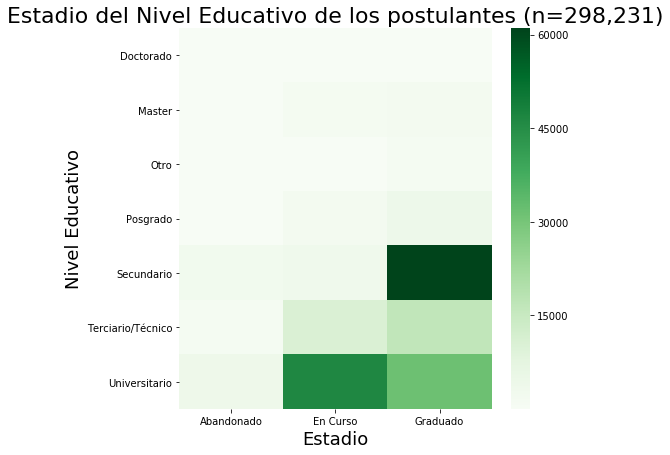

In [15]:
fig, ax =plt.subplots(figsize=(7,7))
g = sns.heatmap(for_heatmap_educacion,  cmap="Greens")
g.set_title("Estadio del Nivel Educativo de los postulantes (n=298,231)", fontsize=22)
g.set_ylabel("Nivel Educativo",fontsize=18)
g.set_xlabel("Estadio", fontsize=18)

In [16]:
# Is level of education dependent on the educational progress?
# Compute Crammer's V or measure of association between two nominal variables
print("Chi-square Indepence Test p-value is ",stats.chi2_contingency(for_heatmap_educacion)[1])
print("Measure of Association is ",round((stats.chi2_contingency(for_heatmap_educacion)[0]/len(educacion) )**(0.5),3))


Chi-square Indepence Test p-value is  0.0
Measure of Association is  0.499


In [17]:
genero = pd.read_csv('Data/datos_navent_fiuba/fiuba_2_postulantes_genero_y_edad.csv')
genero.head()

,idpostulante,fechanacimiento,sexo
0,NM5M,1970-12-03,FEM
1,5awk,1962-12-04,FEM
2,ZaO5,1978-08-10,FEM
3,NdJl,1969-05-09,MASC
4,eo2p,1981-02-16,MASC


In [18]:
genero.shape

(200888, 3)

In [19]:
genero.dtypes

idpostulante       object
fechanacimiento    object
sexo               object
dtype: object

In [20]:
genero.describe(include='all')

,idpostulante,fechanacimiento,sexo
count,200888,196138,200888
unique,200888,15027,3
top,GNZRJ1K,1991-06-20,FEM
freq,1,57,101981


In [21]:
# check for missing values
genero.isnull().sum()

idpostulante          0
fechanacimiento    4750
sexo                  0
dtype: int64

In [22]:
# Check for duplicate rows
genero.duplicated(['idpostulante','sexo','fechanacimiento'],keep='first').sum()

0

In [23]:
genero['fechanacimiento_date'] = pd.to_datetime(genero['fechanacimiento'], errors = 'coerce', format="%Y/%m/%d")
genero['fechanacimiento_date'].value_counts().head()

1994-05-24    57
1991-06-20    57
1993-03-18    56
1989-12-12    54
1991-10-09    53
Name: fechanacimiento_date, dtype: int64

In [24]:
# Look at cases when DoB maybe invalid
genero.loc[(genero['fechanacimiento_date'].isnull()) & (genero['fechanacimiento'].notnull())]

,idpostulante,fechanacimiento,sexo,fechanacimiento_date
56206,xkPwXwY,0031-12-11,FEM,NaT
71458,LN85Y3b,0029-05-11,MASC,NaT
130846,8M2R6pz,0024-02-09,FEM,NaT
141832,A36Npjj,0033-09-14,FEM,NaT
145683,dYjV0rb,0012-11-04,NO_DECLARA,NaT
148638,GNZOvAv,0004-07-19,MASC,NaT
149653,1QPQ8QL,0011-03-08,MASC,NaT


In [25]:
# Compute age
from datetime import date
days_in_year = 365.2425    
genero['age'] = (date.today().year - genero['fechanacimiento_date'].dt.year)
# Restar un año a los que todavia no cumplieron

In [26]:
 genero['age'].describe()

count    196131.000000
mean         30.427658
std           8.336935
min          12.000000
25%          24.000000
50%          28.000000
75%          35.000000
max         243.000000
Name: age, dtype: float64

In [27]:
# Print rows with age > 80 years old
genero.loc[genero['age'] >= 80]

,idpostulante,fechanacimiento,sexo,fechanacimiento_date,age
154559,xkdvwm0,1775-07-09,MASC,1775-07-09,243.0
156483,4rP8l0R,1921-08-18,FEM,1921-08-18,97.0
164618,96X1loa,1917-07-08,MASC,1917-07-08,101.0


In [28]:
# Set age to NaN for age >= 80
genero['age'] = np.where(genero['age'] <=80, genero['age'] , np.NaN)

Text(0,0.5,'Frecuencia')

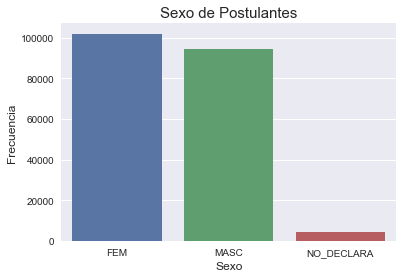

In [29]:
# Bar plot for gender
sns.set(style="darkgrid")
g = sns.countplot(x="sexo", data=genero)
g.set_title("Sexo de Postulantes", fontsize=15)
g.set_xlabel("Sexo", fontsize=12)
g.set_ylabel("Frecuencia", fontsize=12)

In [30]:
fem = genero.loc[genero["sexo"] == "FEM",'age'].dropna()
masc = genero.loc[genero["sexo"] == "MASC",'age'].dropna()
not_declared = genero.loc[genero["sexo"] == "NO_DECLARA",'age'].dropna()

Text(0,0.5,'Densidad')

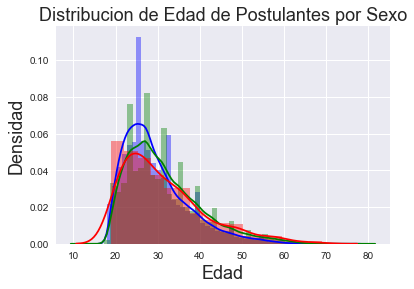

In [31]:
# Check age distribution by gender
g = sns.distplot(fem, color='b')
g = sns.distplot(masc, color='g')
g = sns.distplot(not_declared, color='r')
g.set_title("Distribucion de Edad de Postulantes por Sexo", fontsize=18)
g.set_xlabel("Edad",fontsize=18)
g.set_ylabel("Densidad", fontsize=18)

In [32]:
educacion['in_educacion'] =1
genero['in_genero'] =1

Text(0,0.5,'Edad')

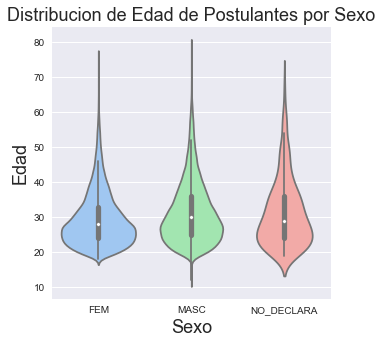

In [33]:
# Violin Plot (Box plot)
fig, ax =plt.subplots(figsize=(5,5))
g = sns.violinplot(x="sexo", y="age", 
                     data=genero, palette="pastel",showmeans=True)
g.set_title("Distribucion de Edad de Postulantes por Sexo", fontsize=18)
g.set_xlabel("Sexo", fontsize=18)
g.set_ylabel("Edad", fontsize=18)

In [34]:
# Combine education and age/sex datasets 
edu_age = pd.merge(educacion[['idpostulante', 'nombre','estado', 'in_educacion']],
                   genero[['idpostulante','sexo','age','in_genero']] ,on = 'idpostulante', how='outer')

In [35]:
len(edu_age)

200888

In [36]:
edu_age['in_educacion'] = edu_age['in_educacion'].fillna(0)

In [37]:
edu_age.head()

,idpostulante,nombre,estado,in_educacion,sexo,age,in_genero
0,zvxzrWm,Universitario,Graduado,1.0,MASC,37.0,1
1,zvxzmED,Secundario,Graduado,1.0,FEM,19.0,1
2,zvxzjoK,Terciario/Técnico,En Curso,1.0,FEM,20.0,1
3,zvxzeBK,Terciario/Técnico,Graduado,1.0,MASC,25.0,1
4,zvxzVr8,Secundario,Graduado,1.0,MASC,28.0,1


In [38]:
# Crosstab to check postulantes that are in one dataset but not in the other
pd.crosstab(edu_age['in_educacion'] , edu_age['in_genero'])

in_genero,1
in_educacion,
0.0,12136
1.0,188752


In [39]:
vistas = pd.read_csv('Data/datos_navent_fiuba/fiuba_3_vistas.csv')
vistas.head()

,idAviso,timestamp,idpostulante
0,1111780242,2018-02-23T13:38:13.187-0500,YjVJQ6Z
1,1112263876,2018-02-23T13:38:14.296-0500,BmVpYoR
2,1112327963,2018-02-23T13:38:14.329-0500,wVkBzZd
3,1112318643,2018-02-23T13:38:17.921-0500,OqmP9pv
4,1111903673,2018-02-23T13:38:18.973-0500,DrpbXDP


In [40]:
vistas.shape

(961897, 3)

In [41]:
vistas.dtypes

idAviso          int64
timestamp       object
idpostulante    object
dtype: object

In [42]:
vistas.describe(include='all')

,idAviso,timestamp,idpostulante
count,9.618970e+05,961897,961897
unique,NaN,960220,87443
top,NaN,2018-02-26T06:24:30.660-0500,dYJV5K2
freq,NaN,3,595
mean,1.111350e+09,NaN,NaN
std,2.553639e+07,NaN,NaN
min,1.585950e+06,NaN,NaN
25%,1.112311e+09,NaN,NaN
50%,1.112347e+09,NaN,NaN
75%,1.112360e+09,NaN,NaN


In [43]:
# check for missing values
vistas.isnull().sum()

idAviso         0
timestamp       0
idpostulante    0
dtype: int64

In [44]:
# Count how many ads each postulante saw and then add this variable back to the dataset
# Here I changed the 'Group By' call
    #avisas_por_postulante = pd.DataFrame(vistas.groupby[''.agg('count'))
    #avisas_por_postulante['avisas_vistas_por_postulante'] = avisas_por_postulante.values
    #avisas_por_postulante['idpostulante'] = avisas_por_postulante.index
    #vistas = pd. merge(vistas, avisas_por_postulante[['idpostulante','avisas_vistas_por_postulante']], on='idpostulante',how='inner')
    

In [45]:
avisos_vistos_por_postulantes = pd.DataFrame(vistas.groupby(['idpostulante', 'idAviso'])['timestamp'].agg('count'))
avisos_vistos_por_postulantes.rename(columns={'timestamp':'cantidadVistas'}, inplace=True)

In [46]:
avisos_vistos_por_postulantes.head(30)

cantidadVistas
idpostulante idAviso                   
0z5VvGv      1111413600               1
             1112368499               1
             1112369554               1
0zB026d      1112358250               6
0zB03O9      1111830203               1
             1112205394               2
             1112234599               2
             1112306281               2
             1112315062               1
             1112316288               8
             1112325383               3
             1112334784               1
             1112334789               2
             1112334791               2
             1112337991               1
             1112340866               2
             1112344907               3
             1112346564               2
             1112356396               1
             1112363488               6
             1112363599               1
             1112363711               5
0zB0YGv      1112314890               1
             1112343194               1
             1112343243               2
             1112344973               7
             1112356396               2
             1112366929               3
             1112369306               2
0zB0xL1      1112358035               1

In [47]:
avisos_vistos_por_postulantes=avisos_vistos_por_postulantes.reset_index()

In [48]:
avisos_vistos_por_postulantes.head(15)

,idpostulante,idAviso,cantidadVistas
0,0z5VvGv,1111413600,1
1,0z5VvGv,1112368499,1
2,0z5VvGv,1112369554,1
3,0zB026d,1112358250,6
4,0zB03O9,1111830203,1
5,0zB03O9,1112205394,2
6,0zB03O9,1112234599,2
7,0zB03O9,1112306281,2
8,0zB03O9,1112315062,1
9,0zB03O9,1112316288,8


In [49]:
vistas_con_cantidad = pd.merge(vistas, avisos_vistos_por_postulantes, on = ['idpostulante','idAviso'], how = 'inner')

In [50]:
vistas_con_cantidad.head()

,idAviso,timestamp,idpostulante,cantidadVistas
0,1111780242,2018-02-23T13:38:13.187-0500,YjVJQ6Z,1
1,1112263876,2018-02-23T13:38:14.296-0500,BmVpYoR,1
2,1112327963,2018-02-23T13:38:14.329-0500,wVkBzZd,1
3,1112318643,2018-02-23T13:38:17.921-0500,OqmP9pv,1
4,1111903673,2018-02-23T13:38:18.973-0500,DrpbXDP,1


In [51]:
# Transform date object to date time
vistas['timestamp_month'] = pd.to_datetime(vistas['timestamp'], errors = 'coerce', format="%Y/%m/%d").dt.month
vistas['timestamp_day'] = pd.to_datetime(vistas['timestamp'], errors = 'coerce', format="%Y/%m/%d").dt.day
vistas['timestamp_hour'] = pd.to_datetime(vistas['timestamp'], errors = 'coerce', format="%Y/%m/%d").dt.hour

In [52]:
vistas['timestamp_date'] = vistas['timestamp'].str.slice(start=0, stop=10, step=None)
vistas['timestamp_date'] = pd.to_datetime(vistas['timestamp_date'], errors = 'coerce', format="%Y/%m/%d", exact=True)

In [53]:
vistas['timestamp_date'].value_counts()

2018-02-26    240783
2018-02-27    230947
2018-02-28    226826
2018-02-25    105245
2018-02-24     90349
2018-02-23     67747
Name: timestamp_date, dtype: int64

Text(0,0.5,'Count')

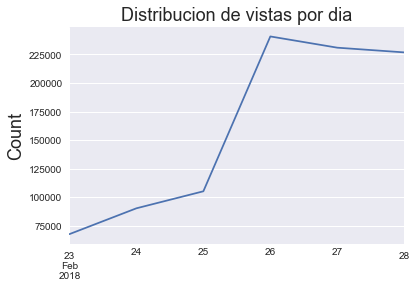

In [54]:
g = vistas['timestamp_date'].value_counts().sort_index().plot()
g.set_title("Distribucion de vistas por dia", fontsize=18)
g.set_ylabel("Count", fontsize=18)

Text(0,0.5,'Count')

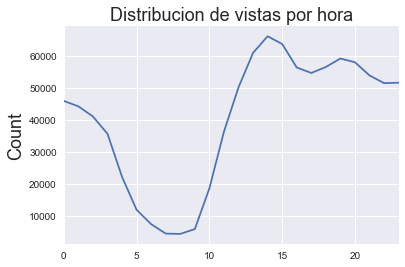

In [55]:
g =vistas['timestamp_hour'].value_counts().sort_index().plot()
g.set_title("Distribucion de vistas por hora", fontsize=18)
g.set_ylabel("Count", fontsize=18)

In [56]:
vistas.head()

,idAviso,timestamp,idpostulante,timestamp_month,timestamp_day,timestamp_hour,timestamp_date
0,1111780242,2018-02-23T13:38:13.187-0500,YjVJQ6Z,2,23,18,2018-02-23
1,1112263876,2018-02-23T13:38:14.296-0500,BmVpYoR,2,23,18,2018-02-23
2,1112327963,2018-02-23T13:38:14.329-0500,wVkBzZd,2,23,18,2018-02-23
3,1112318643,2018-02-23T13:38:17.921-0500,OqmP9pv,2,23,18,2018-02-23
4,1111903673,2018-02-23T13:38:18.973-0500,DrpbXDP,2,23,18,2018-02-23


In [57]:
edu_age.head()

,idpostulante,nombre,estado,in_educacion,sexo,age,in_genero
0,zvxzrWm,Universitario,Graduado,1.0,MASC,37.0,1
1,zvxzmED,Secundario,Graduado,1.0,FEM,19.0,1
2,zvxzjoK,Terciario/Técnico,En Curso,1.0,FEM,20.0,1
3,zvxzeBK,Terciario/Técnico,Graduado,1.0,MASC,25.0,1
4,zvxzVr8,Secundario,Graduado,1.0,MASC,28.0,1


In [58]:
#vistas['in_vistas'] =1

In [59]:
#vistas_edu_age = pd.merge(vistas[['idAviso','idpostulante','avisas_vistas_por_postulante', 'vistas_de_aviso',
#'timestamp_date','timestamp_hour','timestamp_day','in_vistas']],
#                          edu_age ,on = 'idpostulante', how='outer')

In [60]:
# Crosstab to check postulantes that are in one dataset but not in the other
#vistas_edu_age['in_educacion'].fillna(0,inplace=True)
#vistas_edu_age['in_vistas'].fillna(0,inplace=True)
#vistas_edu_age['in_genero'].fillna(0,inplace=True)
#print(pd.crosstab(vistas_edu_age['in_educacion'] , vistas_edu_age['in_vistas']))
#print(pd.crosstab(vistas_edu_age['in_genero'] , vistas_edu_age['in_vistas']))

# Postulaciones

In [61]:
postulaciones = pd.read_csv('Data/datos_navent_fiuba/fiuba_4_postulaciones.csv')

In [62]:
postulaciones.shape

(3401623, 3)

In [63]:
postulaciones.describe(include='all')

,idaviso,idpostulante,fechapostulacion
count,3.401623e+06,3401623,3401623
unique,NaN,200888,1940105
top,NaN,axmjOE,2018-01-17 07:03:36
freq,NaN,3166,25
mean,1.111432e+09,NaN,NaN
std,2.195180e+07,NaN,NaN
min,8.725750e+06,NaN,NaN
25%,1.112261e+09,NaN,NaN
50%,1.112293e+09,NaN,NaN
75%,1.112327e+09,NaN,NaN


In [64]:
postulaciones.rename(columns={"idaviso": "idAviso"},inplace=True)
postulaciones.head()

,idAviso,idpostulante,fechapostulacion
0,1112257047,NM5M,2018-01-15 16:22:34
1,1111920714,NM5M,2018-02-06 09:04:50
2,1112346945,NM5M,2018-02-22 09:04:47
3,1112345547,NM5M,2018-02-22 09:04:59
4,1112237522,5awk,2018-01-25 18:55:03


In [65]:
# check for missing values
postulaciones.isnull().sum()

idAviso             0
idpostulante        0
fechapostulacion    0
dtype: int64

In [66]:
postulaciones.dtypes

idAviso              int64
idpostulante        object
fechapostulacion    object
dtype: object

In [67]:
postulaciones['fechapostulacion_date'] = postulaciones['fechapostulacion'].str.slice(start=0, stop=10, step=None)
postulaciones['fechapostulacion_date'] = pd.to_datetime(postulaciones['fechapostulacion_date'], errors = 'coerce', format="%Y/%m/%d", exact=True)

In [68]:
postulaciones['fechapostulacion_date'].describe()

count                 3401623
unique                     45
top       2018-02-19 00:00:00
freq                   137104
first     2018-01-15 00:00:00
last      2018-02-28 00:00:00
Name: fechapostulacion_date, dtype: object

Text(0,0.5,'Count')

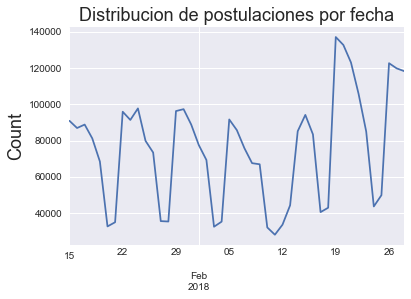

In [69]:
g =postulaciones['fechapostulacion_date'].value_counts().sort_index().plot()
g.set_title("Distribucion de postulaciones por fecha", fontsize=18)
g.set_ylabel("Count", fontsize=18)

Text(0,0.5,'Count')

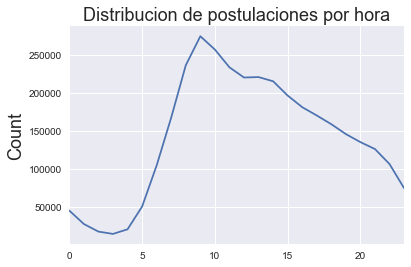

In [70]:
postulaciones['fechapostulacion_hour'] = pd.to_datetime(postulaciones['fechapostulacion'], errors = 'coerce', format="%Y/%m/%d").dt.hour
g =postulaciones['fechapostulacion_hour'].value_counts().sort_index().plot()
g.set_title("Distribucion de postulaciones por hora", fontsize=18)
g.set_ylabel("Count", fontsize=18)

In [71]:
# Count number of postulants for each ad
#postulaciones_por_aviso = pd.DataFrame(postulaciones.groupby('idAviso')['idpostulante'].agg('count'))
#postulaciones_por_aviso['postulantes_por_aviso'] = postulaciones_por_aviso.values
#postulaciones_por_aviso['idAviso'] = postulaciones_por_aviso.index
#postulaciones = pd.merge(postulaciones, postulaciones_por_aviso[['idAviso','postulantes_por_aviso']],
#                         on='idAviso',how='inner')
#len(postulaciones)

In [72]:
postulaciones.head()

,idAviso,idpostulante,fechapostulacion,fechapostulacion_date,fechapostulacion_hour
0,1112257047,NM5M,2018-01-15 16:22:34,2018-01-15,16
1,1111920714,NM5M,2018-02-06 09:04:50,2018-02-06,9
2,1112346945,NM5M,2018-02-22 09:04:47,2018-02-22,9
3,1112345547,NM5M,2018-02-22 09:04:59,2018-02-22,9
4,1112237522,5awk,2018-01-25 18:55:03,2018-01-25,18


In [73]:
#Calculo la cantidad de postulantes distintos para cada aviso
postulantes_por_aviso = pd.DataFrame(postulaciones.groupby('idAviso')['idpostulante'].agg('nunique'))
postulantes_por_aviso.rename(columns={'idpostulante':'cantidadPostulantes'}, inplace=True)
postulantes_por_aviso = postulantes_por_aviso.reset_index()
postulantes_por_aviso.head()

,idAviso,cantidadPostulantes
0,8725750,117
1,11740890,7
2,12543760,986
3,12812680,115
4,1000132160,11


In [74]:
postulantes_por_aviso['cantidadPostulantes'].describe()

count    12692.000000
mean       267.984715
std        542.213766
min          1.000000
25%         33.000000
50%        100.000000
75%        269.250000
max       9932.000000
Name: cantidadPostulantes, dtype: float64

In [75]:
#Calculo la cantidad de postulaciones a distintos avisos por cada postulante
postulaciones_por_postulante = pd.DataFrame(postulaciones.groupby('idpostulante')['idAviso'].agg('nunique'))
postulaciones_por_postulante.rename(columns={'idAviso':'cantidadPostulaciones'}, inplace=True)
postulaciones_por_postulante = postulaciones_por_postulante.reset_index()
postulaciones_por_postulante.head()

,idpostulante,cantidadPostulaciones
0,0z5VvGv,34
1,0zB026d,3
2,0zB03O9,17
3,0zB08lq,1
4,0zB0NWY,1


In [76]:
postulaciones_por_postulante['cantidadPostulaciones'].describe()

count    200888.000000
mean         16.931136
std          31.266369
min           1.000000
25%           3.000000
50%           8.000000
75%          19.000000
max        3166.000000
Name: cantidadPostulaciones, dtype: float64

In [77]:
# count number of postulaciones por portulante
#postulaciones_por_postulante = pd.DataFrame(postulaciones.groupby('idpostulante')['idAviso'].agg('count'))
#postulaciones_por_postulante['postulaciones_por_postulante'] = postulaciones_por_postulante.values
#postulaciones_por_postulante['idpostulante'] = postulaciones_por_postulante.index
#postulaciones = pd.merge(postulaciones, postulaciones_por_postulante[['idpostulante','postulaciones_por_postulante']],
#                         on='idpostulante',how='inner')
#len(postulaciones)

In [79]:
#postulaciones['postulaciones_por_postulante'].describe()

In [80]:
#postulaciones['in_postulaciones'] = 1

In [81]:
#vistas_edu_age = pd.merge(postulaciones
#                          ,'postulaciones_por_postulante', 'postulantes_por_aviso',
#'fechapostulacion_date','fechapostulacion_hour','in_postulaciones']],
#                          vistas_edu_age ,on = 'idpostulante', how='outer')

In [82]:
#vistas_edu_age.head()

In [83]:
avisos = pd.read_csv('Data/datos_navent_fiuba/fiuba_5_avisos_online.csv')
avisos.head()

,idaviso
0,1112355872
1,1112335374
2,1112374842
3,1111984070
4,1111822480


In [84]:
avisos.duplicated(keep='first').sum()

0

In [85]:
avisos.shape

(5028, 1)

In [86]:
avisos['is_online'] =1

In [87]:
avisos_detalle = pd.read_csv('Data/datos_navent_fiuba/fiuba_6_avisos_detalle.csv')
avisos_detalle.head()

,idaviso,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
0,8725750,1,VENDEDOR/A PROVINCIA DE SANTA FE,<p><strong><strong>Empresa:</strong></strong> ...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,VENTOR
1,17903700,1,Enfermeras,<p>Solicitamos para importante cadena de farma...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Salud,Farmacias Central Oeste
2,1000150677,1,Chofer de taxi,<p>TE GUSTA MANEJAR? QUERES GANAR PLATA HACIEN...,Capital Federal,NaN,Empedrado 2336,Full-time,Senior / Semi-Senior,Transporte,FAMITAX SRL
3,1000610287,1,CHOFER DE CAMIONETA BAHIA BLANCA - PUNTA ALTA,<p><strong>Somos una empresa multinacional que...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Transporte,Wurth Argentina S.A
4,1000872556,1,Operarios de Planta - Rubro Electrodomésticos,<p><strong>OPERARIOS DE PLANTA</strong></p><p>...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Producción,ELECTRO OUTLET SRL


In [88]:
avisos_detalle.shape

(13534, 11)

In [89]:
avisos_detalle['nombre_zona'].value_counts()

Gran Buenos Aires              12654
Capital Federal                  876
Buenos Aires (fuera de GBA)        2
GBA Oeste                          2
Name: nombre_zona, dtype: int64

In [90]:
avisos_detalle['in_avisos_detalle'] = 1

In [91]:
avisos_con_detalles = pd.merge(avisos, avisos_detalle ,on = 'idaviso', how='outer')

In [92]:
avisos_con_detalles.head()

,idaviso,is_online,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa,in_avisos_detalle
0,1112355872,1.0,1.0,Recepcionista/Asistente Administrativa,"<p><span lang=""ES"">RE/MAX Liberty, e</span>mpr...",Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Recepcionista,Remax,1.0
1,1112335374,1.0,1.0,Chofer /Operario de deposito con C.N.R.T. (EXC...,<p><strong>Empresa importadora de insumos de i...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Producción,G&G Argentina S.A.,1.0
2,1112374842,1.0,1.0,Ejecutivos de Ventas.,"<p><strong><span lang=""ES"">G&amp;G ARGENTINA</...",Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,G&G Argentina S.A.,1.0
3,1111984070,1.0,1.0,Analista de Marketing,<p>Sony es una de las compañías líderes en la ...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Producto,Sony Argentina S.A.,1.0
4,1111822480,1.0,1.0,Ejecutivo de Cuentas Tecnología,<p><em>En EXPERIS  nos caracterizamos por el ...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,Experis,1.0


In [93]:
avisos_con_detalles['is_online'].fillna(0,inplace=True)
avisos_con_detalles['in_avisos_detalle'].fillna(0,inplace=True)

In [94]:
pd.crosstab(avisos_con_detalles['is_online'],avisos_con_detalles['in_avisos_detalle'] )

in_avisos_detalle,0.0,1.0
is_online,,
0.0,0,8821
1.0,315,4713


In [95]:
avisos_con_detalles.shape

(13849, 13)

In [96]:
avisos_con_detalles.rename(columns={"idaviso": "idAviso"},inplace=True)

In [97]:
#avisos_con_detalles = pd.merge(avisos_con_detalles, avisos_detalle ,on = 'idAviso', how='outer')

Analisis RAUL

In [98]:
vistas.head()

,idAviso,timestamp,idpostulante,timestamp_month,timestamp_day,timestamp_hour,timestamp_date
0,1111780242,2018-02-23T13:38:13.187-0500,YjVJQ6Z,2,23,18,2018-02-23
1,1112263876,2018-02-23T13:38:14.296-0500,BmVpYoR,2,23,18,2018-02-23
2,1112327963,2018-02-23T13:38:14.329-0500,wVkBzZd,2,23,18,2018-02-23
3,1112318643,2018-02-23T13:38:17.921-0500,OqmP9pv,2,23,18,2018-02-23
4,1111903673,2018-02-23T13:38:18.973-0500,DrpbXDP,2,23,18,2018-02-23


In [107]:
postulaciones.head()

,idAviso,idpostulante,fechapostulacion,fechapostulacion_date,fechapostulacion_hour
1525012,1112204687,LNKLkVk,2018-01-15 00:00:01,2018-01-15,0
1269880,1112254546,exbr48,2018-01-15 00:00:02,2018-01-15,0
1842775,1112245687,aoXY6m,2018-01-15 00:00:09,2018-01-15,0
1525013,1112033906,LNKLkVk,2018-01-15 00:00:10,2018-01-15,0
3348905,1111960351,pzjmJAb,2018-01-15 00:00:11,2018-01-15,0


In [108]:
postulaciones.shape

(3401262, 5)

In [110]:
postulaciones = postulaciones.sort_values('fechapostulacion')

In [111]:
postulaciones.head()

,idAviso,idpostulante,fechapostulacion,fechapostulacion_date,fechapostulacion_hour
1525012,1112204687,LNKLkVk,2018-01-15 00:00:01,2018-01-15,0
1269880,1112254546,exbr48,2018-01-15 00:00:02,2018-01-15,0
1842775,1112245687,aoXY6m,2018-01-15 00:00:09,2018-01-15,0
1525013,1112033906,LNKLkVk,2018-01-15 00:00:10,2018-01-15,0
3348905,1111960351,pzjmJAb,2018-01-15 00:00:11,2018-01-15,0


In [116]:
postulaciones_con_vistas = pd.merge(postulaciones, avisos_vistos_por_postulantes, on = ['idAviso','idpostulante'], how = 'inner')

In [126]:
postulaciones_con_vistas.head()

,idAviso,idpostulante,fechapostulacion,fechapostulacion_date,fechapostulacion_hour,cantidadVistas
0,1112241774,bOA2arb,2018-01-15 00:03:43,2018-01-15,0,2
1,1112149552,5pBrJX,2018-01-15 00:15:50,2018-01-15,0,2
2,1112241774,OqjAJvB,2018-01-15 05:25:59,2018-01-15,5,2
3,1112201752,bOJRxkE,2018-01-15 06:08:47,2018-01-15,6,1
4,1112259465,qe2PPm9,2018-01-15 06:11:00,2018-01-15,6,1


In [119]:
#¿Cuántas veces visita un aviso un persona antes de postularse?
postulaciones_con_vistas['cantidadVistas'].mean()

1.7560214286898976

In [120]:
vistas.head()

,idAviso,timestamp,idpostulante,timestamp_month,timestamp_day,timestamp_hour,timestamp_date
0,1111780242,2018-02-23T13:38:13.187-0500,YjVJQ6Z,2,23,18,2018-02-23
1,1112263876,2018-02-23T13:38:14.296-0500,BmVpYoR,2,23,18,2018-02-23
2,1112327963,2018-02-23T13:38:14.329-0500,wVkBzZd,2,23,18,2018-02-23
3,1112318643,2018-02-23T13:38:17.921-0500,OqmP9pv,2,23,18,2018-02-23
4,1111903673,2018-02-23T13:38:18.973-0500,DrpbXDP,2,23,18,2018-02-23


In [122]:
avisos_con_detalles.head()

,idAviso,is_online,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa,in_avisos_detalle
0,1112355872,1.0,1.0,Recepcionista/Asistente Administrativa,"<p><span lang=""ES"">RE/MAX Liberty, e</span>mpr...",Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Recepcionista,Remax,1.0
1,1112335374,1.0,1.0,Chofer /Operario de deposito con C.N.R.T. (EXC...,<p><strong>Empresa importadora de insumos de i...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Producción,G&G Argentina S.A.,1.0
2,1112374842,1.0,1.0,Ejecutivos de Ventas.,"<p><strong><span lang=""ES"">G&amp;G ARGENTINA</...",Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,G&G Argentina S.A.,1.0
3,1111984070,1.0,1.0,Analista de Marketing,<p>Sony es una de las compañías líderes en la ...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Producto,Sony Argentina S.A.,1.0
4,1111822480,1.0,1.0,Ejecutivo de Cuentas Tecnología,<p><em>En EXPERIS  nos caracterizamos por el ...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,Experis,1.0


In [131]:
educacion.head()

,idpostulante,nombre,estado,nombre_num,estado_num,highest_level,in_educacion
213760,zvxzrWm,Universitario,Graduado,3,2,5,1
213454,zvxzmED,Secundario,Graduado,1,2,3,1
211836,zvxzjoK,Terciario/Técnico,En Curso,2,1,3,1
213652,zvxzeBK,Terciario/Técnico,Graduado,2,2,4,1
213648,zvxzVr8,Secundario,Graduado,1,2,3,1


In [137]:
postulaciones_detalladas = pd.merge(postulaciones_con_vistas, avisos_con_detalles, on=['idAviso'])

In [138]:
postulaciones_detalladas.head()

,idAviso,idpostulante,fechapostulacion,fechapostulacion_date,fechapostulacion_hour,cantidadVistas,is_online,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa,in_avisos_detalle
0,1112241774,bOA2arb,2018-01-15 00:03:43,2018-01-15,0,2,1.0,1.0,Cajeros/Repositores Eventuales - GBA Zona Oeste,"<p><span style="""">Importante empresa de retail...",Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,Manpower,1.0
1,1112241774,OqjAJvB,2018-01-15 05:25:59,2018-01-15,5,2,1.0,1.0,Cajeros/Repositores Eventuales - GBA Zona Oeste,"<p><span style="""">Importante empresa de retail...",Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,Manpower,1.0
2,1112241774,8MPXrNO,2018-01-15 09:02:14,2018-01-15,9,1,1.0,1.0,Cajeros/Repositores Eventuales - GBA Zona Oeste,"<p><span style="""">Importante empresa de retail...",Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,Manpower,1.0
3,1112241774,pzM9V6m,2018-01-15 16:18:09,2018-01-15,16,1,1.0,1.0,Cajeros/Repositores Eventuales - GBA Zona Oeste,"<p><span style="""">Importante empresa de retail...",Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,Manpower,1.0
4,1112241774,ez9138,2018-01-16 11:10:18,2018-01-16,11,1,1.0,1.0,Cajeros/Repositores Eventuales - GBA Zona Oeste,"<p><span style="""">Importante empresa de retail...",Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,Manpower,1.0


In [155]:
variedad_de_busquedas = pd.DataFrame(postulaciones_detalladas.groupby('idpostulante')['nombre_area'].agg('nunique'))
variedad_de_busquedas.rename(columns={'nombre_area':'variedadDeAreas'}, inplace=True)
variedad_de_busquedas.head()

,variedadDeAreas
idpostulante,
0zB03O9,5
0zB0YGv,4
0zB0xL1,1
0zB11wr,1
0zB16Dr,1


In [156]:
variedad_de_busquedas['variedadDeAreas'].value_counts()

1     34862
2     17290
3      9438
4      5174
5      3090
6      1926
7      1212
8       811
9       574
10      363
11      275
12      187
13      145
14      108
15       75
16       63
17       50
19       33
18       30
20       29
23       19
21       17
22       12
24       11
29        8
25        7
26        6
27        6
28        5
31        5
33        5
40        3
50        2
30        2
32        2
42        2
68        1
62        1
97        1
34        1
35        1
36        1
38        1
41        1
44        1
48        1
64        1
Name: variedadDeAreas, dtype: int64

In [157]:
variedad_de_busquedas = variedad_de_busquedas.reset_index()
variedad_de_busquedas.head()

,idpostulante,variedadDeAreas
0,0zB03O9,5
1,0zB0YGv,4
2,0zB0xL1,1
3,0zB11wr,1
4,0zB16Dr,1


In [158]:
variedad_de_busquedas = pd.merge(variedad_de_busquedas, educacion, on = 'idpostulante')

In [159]:
variedad_de_busquedas.head()

,idpostulante,variedadDeAreas,nombre,estado,nombre_num,estado_num,highest_level,in_educacion
0,0zB03O9,5,Terciario/Técnico,En Curso,2,1,3,1
1,0zB0YGv,4,Universitario,Abandonado,3,0,3,1
2,0zB0xL1,1,Universitario,En Curso,3,1,4,1
3,0zB11wr,1,Universitario,Graduado,3,2,5,1
4,0zB16Dr,1,Universitario,En Curso,3,1,4,1


In [ ]:
#Ver como graficar la relacion entre variedad de areas y highest_level

In [48]:
vistas.head()

,idAviso,timestamp,idpostulante,avisas_vistas_por_postulante
0,1111780242,2018-02-23T13:38:13.187-0500,YjVJQ6Z,4
1,1112301574,2018-02-27T11:28:37.162-0500,YjVJQ6Z,4
2,1112319451,2018-02-27T11:26:31.101-0500,YjVJQ6Z,4
3,1112326950,2018-02-27T11:28:43.417-0500,YjVJQ6Z,4
4,1112263876,2018-02-23T13:38:14.296-0500,BmVpYoR,16
